##***Introducción***##

En este proyecto  se pretende utilizar el algoritmo de descenso por gradiente para manifiestar es para practicar regresión lineal.


#Importando librerias necesarias#

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Cargando los Datos  y Renombrando Columnas#

Cargando los datos a un array con Numpy

In [10]:
data_array = np.load("/content/proyecto_training_data.npy")

Cargando los datos a un DataFrame con Pandas para mayor facilidad en la manipulación de datos.

In [11]:
data= pd.DataFrame(data_array)
data.head()

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


Renombrando las columnas para mejor entendimiento de los tados:

In [17]:
data.columns = ["Sale Price","Overall-Quality", "1stFlrSF", "TotRmsAbvGrd","YearBuilt","LotFrontage"]
data.head()


,Sale Price,Overall-Quality,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


#Dividiendo los datos de entrenamiento y de testing.

El set es dividido en 2 partes. El data_train representa los datos a entrenar y el data_test representa los datos para validar nuestro algoritmo.

In [36]:
n=len(data)   #Número de registros en el dataSet
train=int(0.8*n)   #80% de los registros totales para entrenar.
data_train, data_test=data[:train], data[train:]   #Usando slicing para dividir el set en 2.
print(f"Registros de entrenamiento: {len(data_train)} \nRegistros para Testeo: {len(data_test)} \n")


Registros de entrenamiento: 1168 
Registros para Testeo: 292 



#Analisis Exploratorio de Datos

Los números para describir los datos son presentados en una tabla usando pandas. 

In [48]:
AED = {"Media":data.mean(), "Valor Máximo": data.max(), "Valor Minimo": data.min(), "Rango": data.max()-data.min(), "Desviación Standar": data.std()}
pd.DataFrame(AED)

,Media,Valor Máximo,Valor Minimo,Rango,Desviación Standar
Sale Price,180921.195890,755000.0,34900.0,720100.0,79442.502883
Overall-Quality,6.099315,10.0,1.0,9.0,1.382997
1stFlrSF,1162.626712,4692.0,334.0,4358.0,386.587738
TotRmsAbvGrd,6.517808,14.0,2.0,12.0,1.625393
YearBuilt,1971.267808,2010.0,1872.0,138.0,30.202904
LotFrontage,70.049958,313.0,21.0,292.0,24.284752


#Histogramas de Cada Variable#

Acá se presentan todos los histogramas de cada variable.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


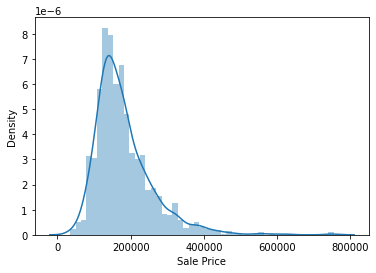

In [92]:
sns.distplot(data['Sale Price'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


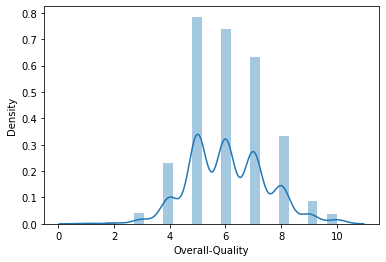

In [93]:
sns.distplot(data['Overall-Quality'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


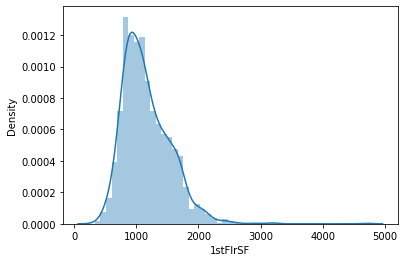

In [94]:
sns.distplot(data['1stFlrSF'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


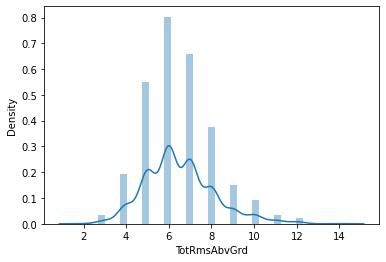

In [95]:
sns.distplot(data['TotRmsAbvGrd'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


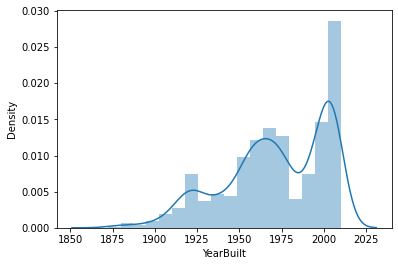

In [96]:
sns.distplot(data['YearBuilt'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


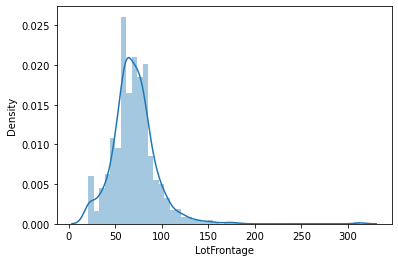

In [141]:
sns.distplot(data['LotFrontage'])

#Coeficientes de Correlación y ScatterPlots

**-Coeficientes de Correlación entre variables**

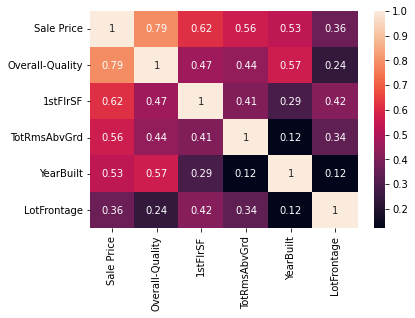

In [140]:
sns.heatmap(data_train.corr(),annot=True)
plt.show()

**-Gráficas con MatplotLib**

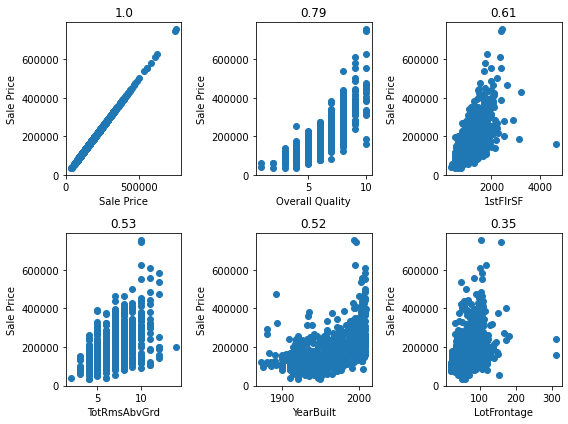

In [145]:
fig, axes =plt.subplots(2,3)
y=data['Sale Price']

#Tamaño
fig.set_figheight(6)
fig.set_figwidth(8)

#Graficas
axes[0,0].scatter(y,y)
axes[0,1].scatter(data['Overall-Quality'],y)
axes[0,2].scatter(data["1stFlrSF"],y)
axes[1,0].scatter(data['TotRmsAbvGrd'],y)
axes[1,1].scatter(data['YearBuilt'],y)
axes[1,2].scatter(data['LotFrontage'],y)

#Correlaciones
axes[0,0].set_title(round(y.corr(y),2))
axes[0,1].set_title(round(y.corr(data['Overall-Quality']),2))
axes[0,2].set_title(round(y.corr(data["1stFlrSF"]),2))
axes[1,0].set_title(round(y.corr(data['TotRmsAbvGrd']),2))
axes[1,1].set_title(round(y.corr(data['YearBuilt']),2))
axes[1,2].set_title(round(y.corr(data['LotFrontage']),2))

#Etiquetas en Y
for i in range(2):
  for j in range(3):
    axes[i,j].set_ylabel("Sale Price")


#Etiquetas en X
axes[0,0].set_xlabel("Sale Price")
axes[0,1].set_xlabel("Overall Quality")
axes[0,2].set_xlabel("1stFlrSF")
axes[1,0].set_xlabel('TotRmsAbvGrd')
axes[1,1].set_xlabel('YearBuilt')
axes[1,2].set_xlabel('LotFrontage')

fig.tight_layout()
plt.show()

En la gráfica anterior se puede observar que existe mayor correlación para el precio de ventas por parte de las variables **Overall Quality y  First Floor square feet (1stFlrSF:)**  Por lo que se tomarán estas dos variables para nuestros modelos de entrenamiento.